# Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand its structure, key patterns, and insights. The EDA process helps in identifying trends, relationships, and potential issues in the data, laying a strong foundation for data preprocessing and model building.


## Importing Libraries

In [9]:
import pandas as pd
#from google.colab import files
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import warnings


## Loading Datasets

In [11]:
data = pd.read_csv("all_season_details.csv", low_memory=False)

In [12]:
#Make copy of dataframe
ipl_df=data.copy()

In [13]:
#shows first 5 rows
ipl_df.head()

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN
3,140,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shorter and slanting into middle and leg, Gaik...","<p>Rummy: ""Fast bowling options for CSK defini...",NaN
4,150,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Shami hits a heavy length and brings this back...,"<p>LG: ""Watching out for Hangargekar. He was i...",NaN


In [14]:
# gives data type and non-null values
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242550 entries, 0 to 242549
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         242550 non-null  int64  
 1   season             242067 non-null  float64
 2   match_id           242550 non-null  int64  
 3   match_name         242550 non-null  object 
 4   home_team          242550 non-null  object 
 5   away_team          242550 non-null  object 
 6   current_innings    242550 non-null  object 
 7   innings_id         242550 non-null  int64  
 8   over               242550 non-null  int64  
 9   ball               242550 non-null  int64  
 10  runs               242550 non-null  int64  
 11  shortText          242550 non-null  object 
 12  isBoundary         242550 non-null  bool   
 13  isWide             242550 non-null  bool   
 14  isNoball           242550 non-null  bool   
 15  batsman1_id        242550 non-null  int64  
 16  ba

In [15]:
# dropped unneccessary cols
ipl_df = ipl_df.drop(['comment_id', 'shortText', 'text', 'preText', 'postText'], axis=1)

In [16]:
# gives number of null values in each cols
ipl_df.isnull().sum()

season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wicket_id            230670
wkt_batsman_name     230670
wkt_bowler_name     

In [17]:
# Identify match_ids with missing season values that couldn't be filled
missing_season_match_ids = ipl_df[ipl_df['season'].isnull()]['match_id'].unique()
missing_season_match_ids

array([1359496, 1359538])

In [18]:
# fill match_id 1359496, 1359538 with season 2023
ipl_df.loc[ipl_df['match_id'] == 1359496, 'season'] = 2023
ipl_df.loc[ipl_df['match_id'] == 1359538, 'season'] = 2023

# Type Conversion

In [20]:
ipl_df['season'] = ipl_df['season'].astype(int)  # object to int
ipl_df['isWide'] = ipl_df['isWide'].astype(bool)  # object to bool
ipl_df['isNoball'] = ipl_df['isNoball'].astype(bool) # object to bool
ipl_df['batsman1_runs'] = ipl_df['batsman1_runs'].astype(int)  # float to int
ipl_df['batsman1_balls'] = ipl_df['batsman1_balls'].astype(int)
ipl_df['bowler1_runs'] = ipl_df['bowler1_runs'].astype(int)
ipl_df['bowler1_wkts'] = ipl_df['bowler1_wkts'].astype(int)
ipl_df['bowler1_maidens'] = ipl_df['bowler1_maidens'].astype(int)

In [21]:
# make sure all fields has converted to proper dtype
ipl_df.dtypes

season                 int64
match_id               int64
match_name            object
home_team             object
away_team             object
current_innings       object
innings_id             int64
over                   int64
ball                   int64
runs                   int64
isBoundary              bool
isWide                  bool
isNoball                bool
batsman1_id            int64
batsman1_name         object
batsman1_runs          int64
batsman1_balls         int64
bowler1_id             int64
bowler1_name          object
bowler1_overs        float64
bowler1_maidens        int64
bowler1_runs           int64
bowler1_wkts           int64
batsman2_id           object
batsman2_name         object
batsman2_runs          int64
batsman2_balls         int64
bowler2_id           float64
bowler2_name          object
bowler2_overs        float64
bowler2_maidens      float64
bowler2_runs         float64
bowler2_wkts         float64
wicket_id            float64
wkt_batsman_na

In [23]:
#unique team names
unique_innings=ipl_df['current_innings'].unique()
print(f"IPL teams: {unique_innings}")

IPL teams: ['CSK' 'GT' 'PBKS' 'KKR' 'LSG' 'DC' 'RR' 'SRH' 'MI' 'RCB' 'KXIP' 'RPS'
 'GL' 'PWI' 'Kochi']


In [24]:
# Replace 'KXIP' with 'PBKS' in specified columns
ipl_df[['home_team', 'away_team', 'current_innings']] = ipl_df[['home_team', 'away_team', 'current_innings']].replace('KXIP', 'PBKS')

In [25]:
def get_team_name(abbreviation):
    team_mapping = {
        'CSK': 'Chennai Super Kings',
        'GT': 'Gujarat Titans',
        'PBKS': 'Punjab Kings',
        'KKR': 'Kolkata Knight Riders',
        'LSG': 'Lucknow Super Giants',
        'DC': 'Delhi Capitals',
        'RR': 'Rajasthan Royals',
        'SRH': 'Sunrisers Hyderabad',
        'MI': 'Mumbai Indians',
        'RCB': 'Royal Challengers Bangalore',
        'RPS': 'Rising Pune Supergiant',
        'GL': 'Gujarat Lions',
        'PWI': 'Pune Warriors India',
        'Kochi': 'Kochi Tuskers Kerala'
    }
    return team_mapping.get(abbreviation, "Unknown Team")


# Season-wise Analysis

## Number of Matches Played in Each IPL Season

This bar chart visualizes the number of matches played in each IPL season. Each bar represents a season, and the height corresponds to the total matches played. The data is sorted in descending order to highlight the seasons with the highest match count.

### Key Findings

- **2013** had the highest number of matches played, totaling **74 matches**.
- Both **2012** and **2022** also had a match count of **74**.
- **2009** had the fewest matches played, with only **57 matches**.


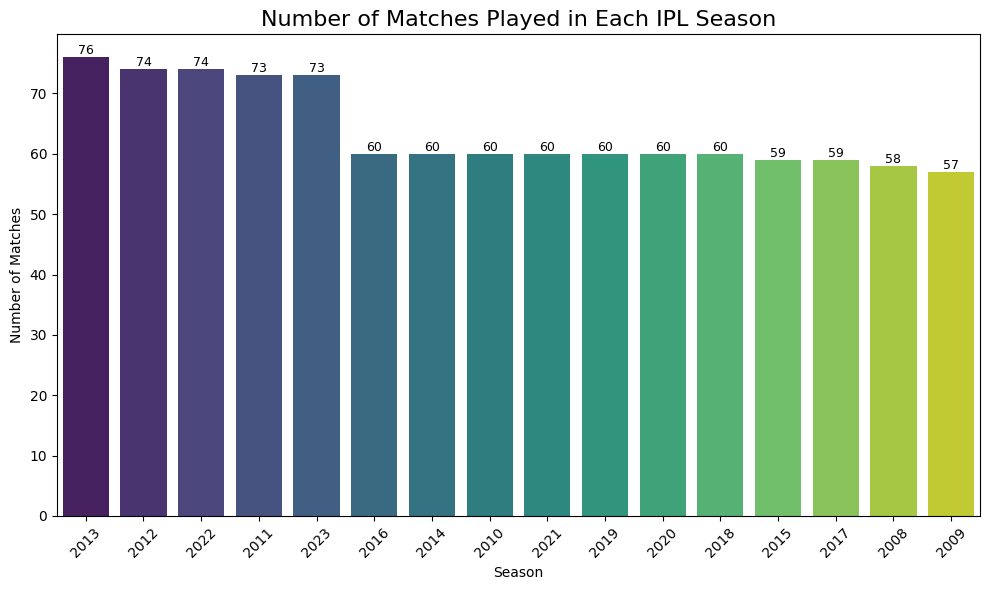

In [28]:
warnings.filterwarnings('ignore')

matches_per_season = ipl_df.groupby(['season'])['match_id'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
palette=sns.color_palette('viridis',n_colors=len(matches_per_season))

bargraph=sns.barplot(x='season', y='match_id', data=matches_per_season, palette=palette,order=matches_per_season['season'])

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', 
        va='bottom' ,
        fontsize= 9
    )


plt.title('Number of Matches Played in Each IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Number of Matches', fontsize=10)

plt.xticks(rotation=45)

plt.tight_layout()
plt.style.use('fivethirtyeight')
plt.show()

## Total Runs Scored in Each IPL Season

This bar chart illustrates the total runs scored across each IPL season, providing insight into the scoring trends and potential changes in game dynamics over time.


### Key Findings

- The **2023 season** recorded the highest total runs, followed closely by **2022** and **2013**.
- **2009** had the lowest total runs scored among all seasons.


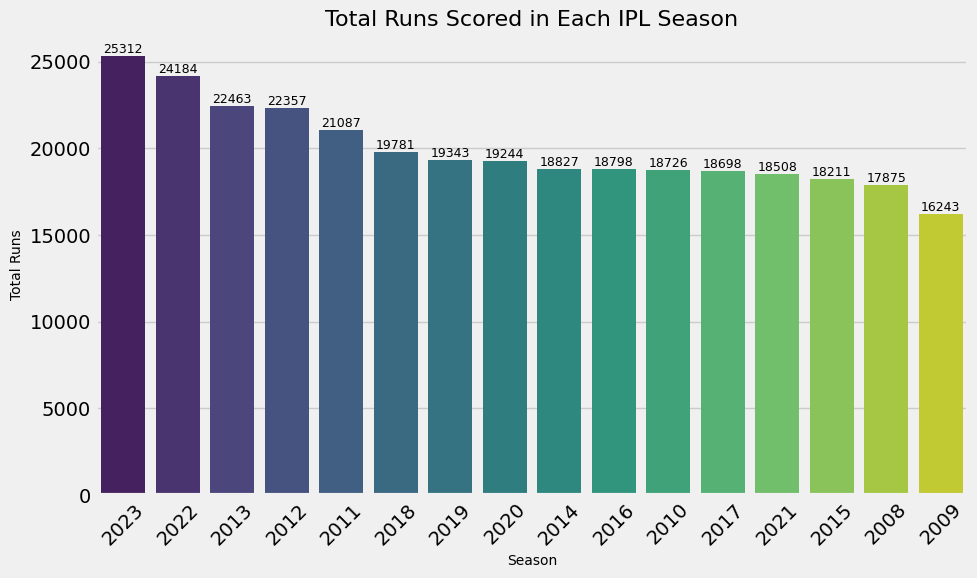

In [30]:
warnings.filterwarnings('ignore')

total_runs_per_season = ipl_df.groupby(['season'])['runs'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(10, 6))

palette = sns.color_palette('viridis', n_colors=len(total_runs_per_season))
bargraph = sns.barplot(x='season', y='runs', data=total_runs_per_season,  order=total_runs_per_season['season'],palette=palette)

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', 
        va='bottom',
        fontsize=9
    )

plt.title('Total Runs Scored in Each IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Total Runs', fontsize=10)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Total Wickets Taken in Each IPL Season

This bar chart displays the total number of wickets taken in each IPL season, helping to visualize trends in bowling effectiveness or game dynamics across seasons.

Key Findings:
- **2013** saw the highest number of wickets taken, followed by **2023** and **2022**.
- **2020** recorded the lowest total wickets.

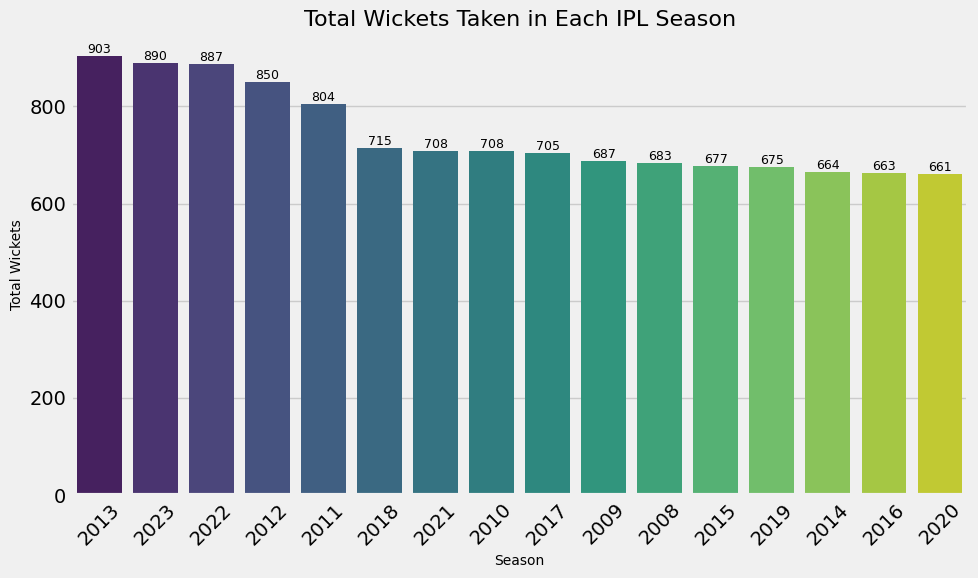

In [35]:

wickets_per_season = ipl_df.groupby(['season'])['wicket_id'].count().sort_values(ascending=False).reset_index()
# print(wickets_per_season)
# print()
plt.figure(figsize=(10, 6))

bargraph = sns.barplot(x='season', y='wicket_id', data=wickets_per_season, 
                        order=wickets_per_season['season'], palette='viridis')

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', 
        va='bottom',
        fontsize=9
    )

plt.title('Total Wickets Taken in Each IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Total Wickets', fontsize=10)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Total Boundaries Hit in Each IPL Season

This bar chart shows the total number of boundaries hit in each IPL season, offering insights into the offensive play and batting aggression over the years.

Key Findings:
- **2023** recorded the highest number of boundaries, followed by **2022** and **2013**.
- **2009** had the least number of boundaries,beacause of less number of matches.


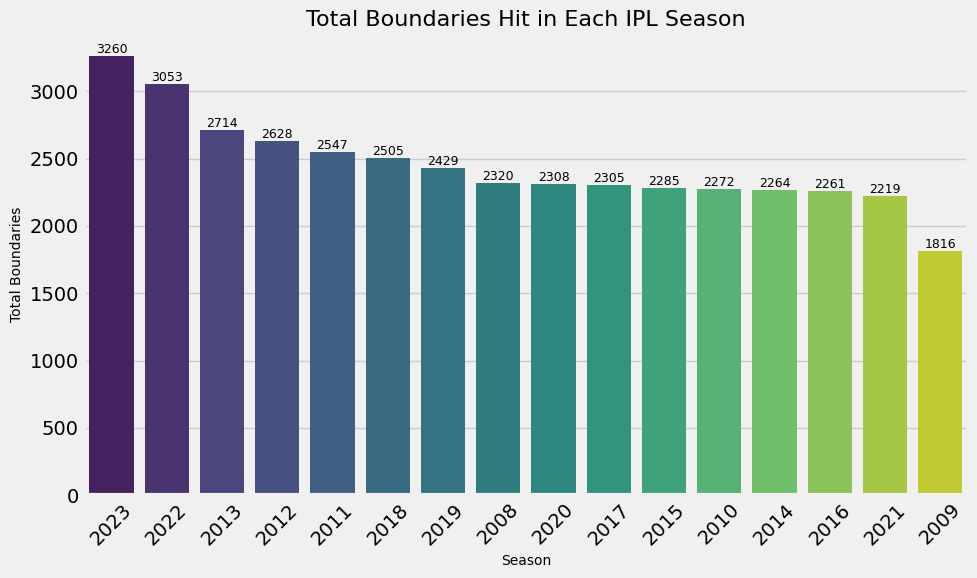

In [47]:
boundaries_per_season = ipl_df.groupby(['season'])['isBoundary'].sum().sort_values(ascending=False).reset_index()

# print(boundaries_per_season)
plt.figure(figsize=(10, 6))

bargraph = sns.barplot(x='season', y='isBoundary', data=boundaries_per_season, 
                        order=boundaries_per_season['season'], palette='viridis')

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', 
        va='bottom',
        fontsize=9
    )

plt.title('Total Boundaries Hit in Each IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Total Boundaries', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Total No-Balls Bowled in Each IPL Season

This bar chart displays the total number of no-balls bowled in each IPL season, highlighting trends in bowling discipline or errors over the years.

Key Findings:
- **2023** had the highest number of no-balls bowled, with a total of **97**, followed by **2011** with **83** and **2008** with **82**.
- **2017** recorded the least number of no-balls, with only **38**, indicating better bowling accuracy or discipline during that season.


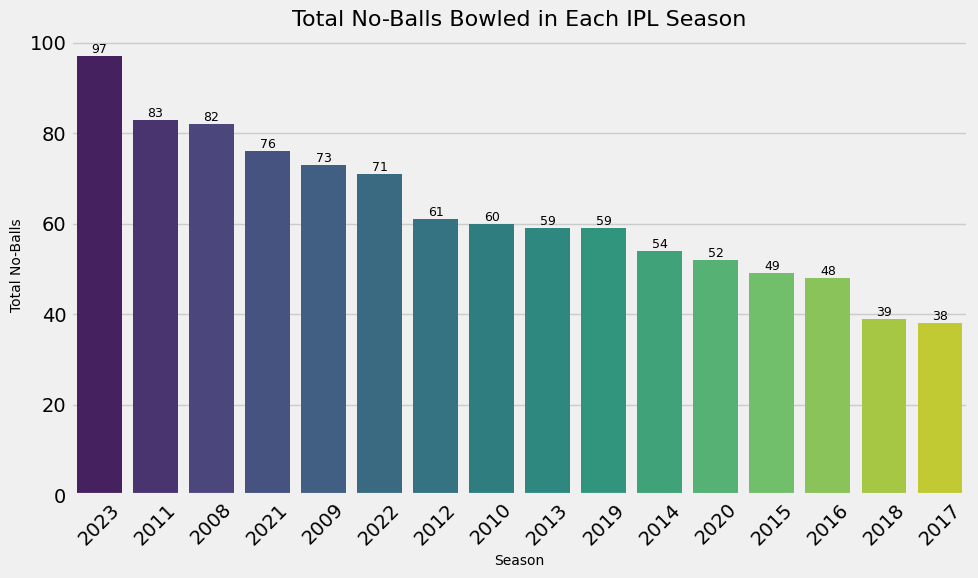

In [51]:
noballs_per_season = ipl_df.groupby(['season'])['isNoball'].sum().sort_values(ascending=False).reset_index()

# print(noballs_per_season)

plt.figure(figsize=(10, 6))

bargraph = sns.barplot(x='season', y='isNoball', data=noballs_per_season, 
                        order=noballs_per_season['season'], palette='viridis')

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', 
        va='bottom',
        fontsize=9
    )

plt.title('Total No-Balls Bowled in Each IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Total No-Balls', fontsize=10)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Total Wides Bowled in Each IPL Season

This bar chart represents the total number of wides bowled in each IPL season, shedding light on the consistency and control of bowlers over the years.

Key Findings:
- **2022** had the highest number of wides bowled, with **696**, followed by **2023** with **615**.
- **2019** recorded the least number of wides, with only **395**, indicating better control from bowlers in that season.


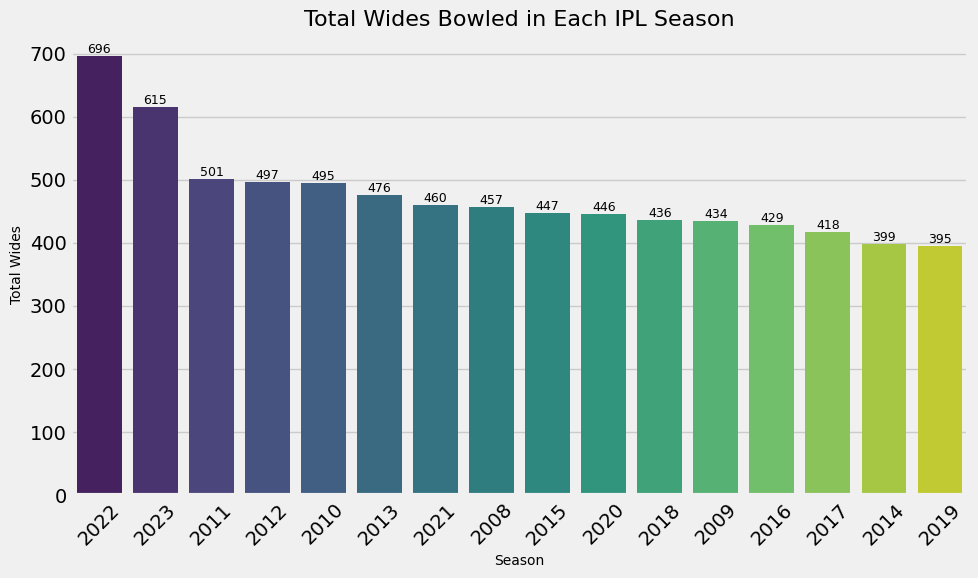

In [54]:

wides_per_season = ipl_df.groupby(['season'])['isWide'].sum().sort_values(ascending=False).reset_index()

# print(wides_per_season)

plt.figure(figsize=(10, 6))

bargraph = sns.barplot(x='season', y='isWide', data=wides_per_season, 
                        order=wides_per_season['season'], palette='viridis')

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', 
        va='bottom',
        fontsize=9
    )

plt.title('Total Wides Bowled in Each IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Total Wides', fontsize=10)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


## Total Unique Matches Played Across All IPL Seasons

This calculation sums the total number of unique matches played across all seasons of the IPL.



In [59]:
total_unique_matches = ipl_df.groupby(['season'])['match_id'].nunique().sum()
print(total_unique_matches)


1023


## Distribution of Runs

This plot visualizes the distribution of runs scored in each ball across all matches.



Total runs: 319657


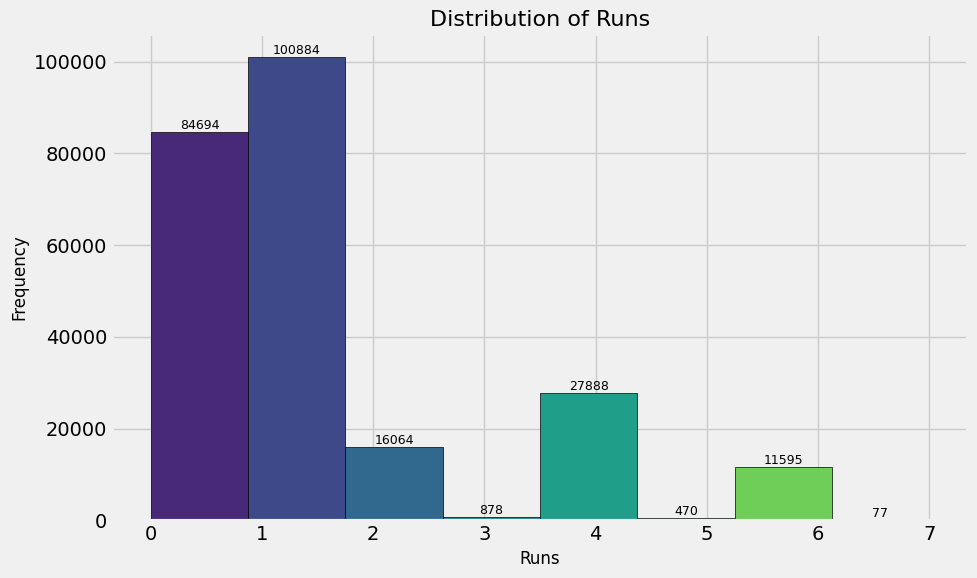

In [62]:
counts, bin_edges = np.histogram(ipl_df['runs'], bins=8)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(10, 6))

palette = sns.color_palette('viridis', n_colors=len(counts))

for i, (count, color) in enumerate(zip(counts, palette)):
    plt.bar(bin_centers[i], count, width=bin_edges[1] - bin_edges[0], color=color, edgecolor='black')

total_runs = ipl_df['runs'].sum()
print(f"Total runs: {total_runs}")

for i, count in enumerate(counts):
    plt.text(bin_centers[i], count, int(count), ha='center', va='bottom', fontsize=9)

plt.title('Distribution of Runs', fontsize=16)
plt.xlabel('Runs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

## Delivery Frequency Analysis

This visualization comprises three subplots that analyze the frequency of different types of deliveries in cricket matches. Each subplot focuses on a specific delivery type, showcasing the frequency counts for `Boundaries`, `Wide Balls`, and `No-Balls`.

#### 1. Boundary Delivery Frequency
- This subplot illustrates the number of deliveries that resulted in boundaries (`isBoundary`).

#### 2. Wide Delivery Frequency
- This subplot shows the frequency of wide balls (`isWide`).

#### 3. No-Ball Delivery Frequency
- This subplot focuses on the count of no-ball deliveries (`isNoball`).
  
This analysis provides valuable insights into delivery patterns, helping teams focus on specific areas for improvement.


Total balls: 319657



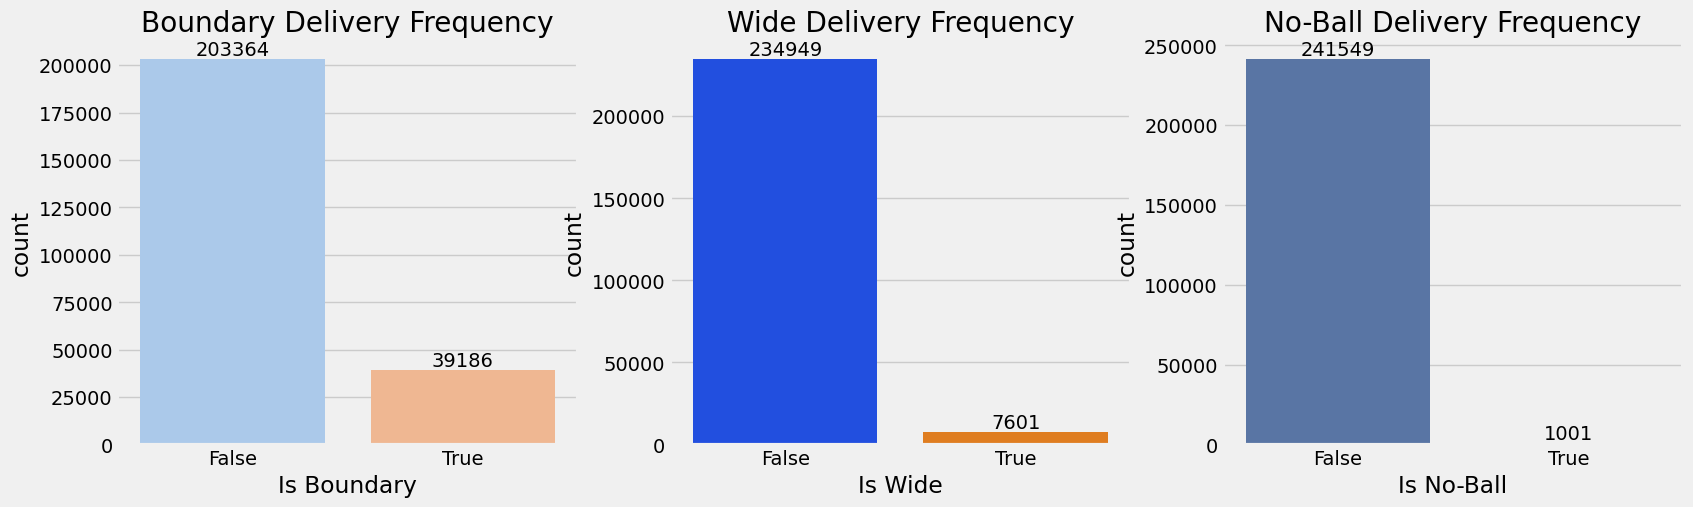

In [65]:

warnings.filterwarnings("ignore")
boundary_count = ipl_df['isBoundary'].value_counts()
wide_count = ipl_df['isWide'].value_counts()
noball_count = ipl_df['isNoball'].value_counts()
#print(f"Total balls: {ipl_df['runs'].sum()}", f"Boundary Count: {boundary_count}"\n, f"Wide Count: {wide_count}" \n, f"No-Ball Count: {noball_count}")
print(f"Total balls: {ipl_df['runs'].sum()}\n")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='isBoundary', data=ipl_df, ax=ax[0], palette='pastel', legend=False)
ax[0].set_title('Boundary Delivery Frequency')
ax[0].set_xlabel('Is Boundary')
# Add observations on top of bars
for patch in ax[0].patches:
    ax[0].text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
               int(patch.get_height()), ha='center', va='bottom')

sns.countplot(x='isWide', data=ipl_df, ax=ax[1], palette='bright', legend=False)
ax[1].set_title('Wide Delivery Frequency')
ax[1].set_xlabel('Is Wide')

for patch in ax[1].patches:
    ax[1].text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
               int(patch.get_height()), ha='center', va='bottom')

sns.countplot(x='isNoball', data=ipl_df, ax=ax[2], palette='deep', legend=False)
ax[2].set_title('No-Ball Delivery Frequency')
ax[2].set_xlabel('Is No-Ball')

for patch in ax[2].patches:
    ax[2].text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
               int(patch.get_height()), ha='center', va='bottom')

plt.show()

# **Team-wise Analysis**

## Distribution of No-Balls Bowled by Each Home Team

This pie chart shows the distribution of no-balls bowled by each of the  10  teams. The size of each slice is proportional to the total no-balls bowled by that team, and the percentage labels show their contribution to the overall no-ball count.

Key Findings:
- From the chart, we can observe that **RCB** topped the list, followed by **MI and DC**, which have bowled the most wides among the  teams.



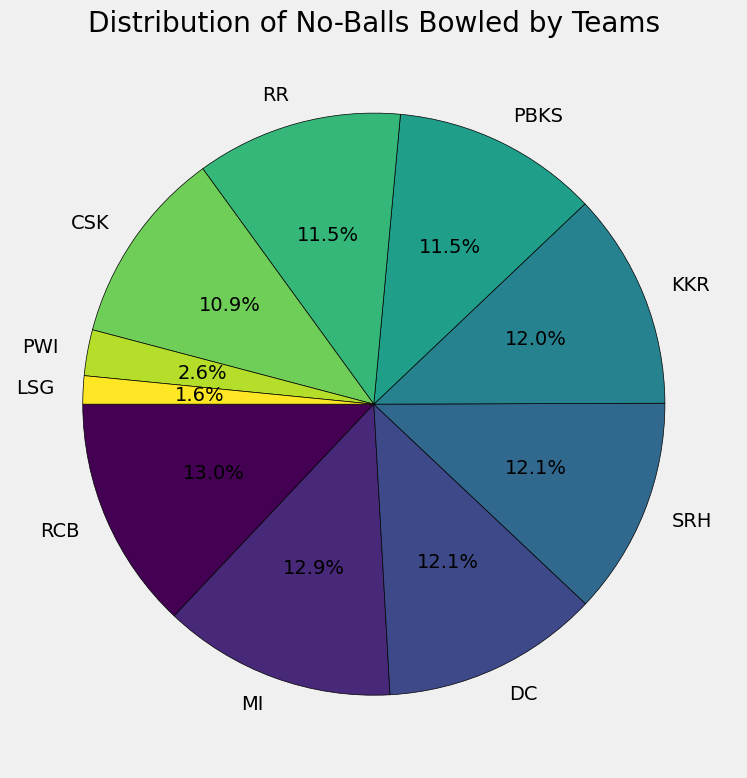

In [68]:
home_team_noballs = ipl_df.groupby('home_team')['isNoball'].sum().sort_values(ascending=False)
away_team_noballs = ipl_df.groupby('away_team')['isNoball'].sum().sort_values(ascending=False)

combined_noballs = home_team_noballs.add(away_team_noballs, fill_value=0)

combined_noballs = combined_noballs.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
combined_noballs.plot.pie(
    autopct='%1.1f%%',  
    startangle=180,     
    cmap='viridis',      
    wedgeprops={'edgecolor': 'black'}  
)

plt.title('Distribution of No-Balls Bowled by Teams')
plt.ylabel('') 
plt.tight_layout()  
plt.show()


## Distribution of Wides Bowled by Each  Team

This pie chart illustrates the distribution of wides bowled by each of the 10 teams. The size of each slice is proportional to the total number of wides bowled by that team, with the percentage labels indicating their share of the overall wide count.

### Key Findings:
- From the chart, we can observe that **MI** topped the list, followed by **RCB** and **PBKS**, which have bowled the most wides among all the teams.


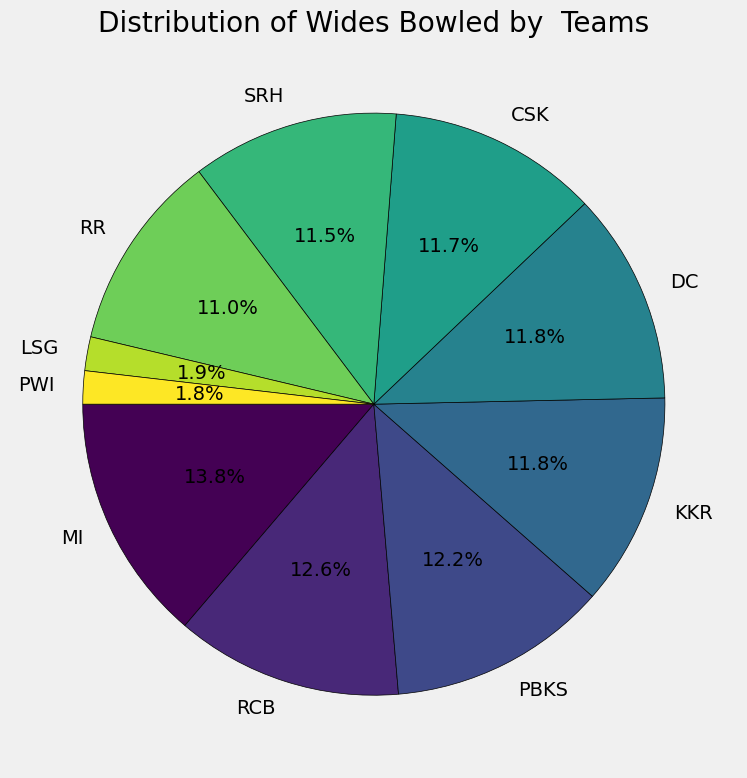

In [72]:
home_team_wides = ipl_df.groupby('home_team')['isWide'].sum()
away_team_wides = ipl_df.groupby('away_team')['isWide'].sum()

combined_wides = home_team_wides.add(away_team_wides, fill_value=0)

combined_wides = combined_wides.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
combined_wides.plot.pie(
    autopct='%1.1f%%',   
    startangle=180,      
    cmap='viridis',       
    wedgeprops={'edgecolor': 'black'} 
)

plt.title('Distribution of Wides Bowled by  Teams')
plt.ylabel('') 
plt.tight_layout()
plt.show()


## Total Number of Matches Played by Each Team (Home + Away)

This bar chart represents the total matches played by each team, combining both home and away games. Each bar corresponds to a team, with the bar height illustrating the total number of matches. Values are annotated above each bar for clarity.

Key Findings:
- **MI** has participated in the highest number of matches, indicating consistent presence across multiple seasons.



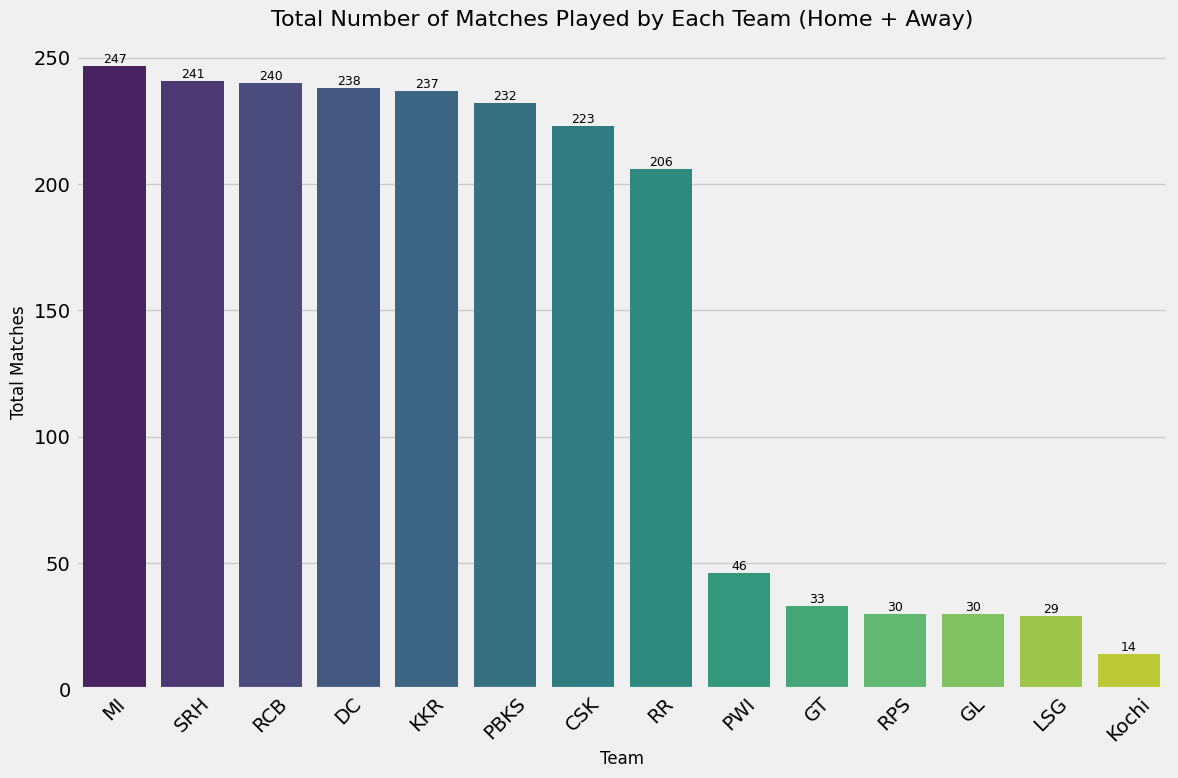

In [75]:
warnings.filterwarnings('ignore')

home_matches = ipl_df.groupby('home_team')['match_id'].nunique()
away_matches = ipl_df.groupby('away_team')['match_id'].nunique()
total_matches = home_matches.add(away_matches, fill_value=0).sort_values(ascending=False).reset_index()
total_matches.columns = ['team', 'total_matches']

plt.figure(figsize=(12, 8))
palette = sns.color_palette('viridis', n_colors=len(total_matches))

bargraph = sns.barplot(x='team', y='total_matches', data=total_matches, palette=palette)

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', 
        va='bottom',
        fontsize=9
    )

plt.title('Total Number of Matches Played by Each Team (Home + Away)', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Matches', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **Batsmen Analysis**

## Top 10 Batsmen by Total Runs Scored

This bar chart displays the top 10 batsmen in terms of total runs scored. Each bar represents a batsman, with the bar height indicating the total runs they have scored. Annotations above each bar provide the exact run totals.

Key Findings:
- **Virat Kohli** leads with the highest total runs, showcasing his consistency and scoring ability.
- He is followed closely by **Shikhar Dhawan** and **David Warner**, with **Rohit Sharma** also among the top scorers.



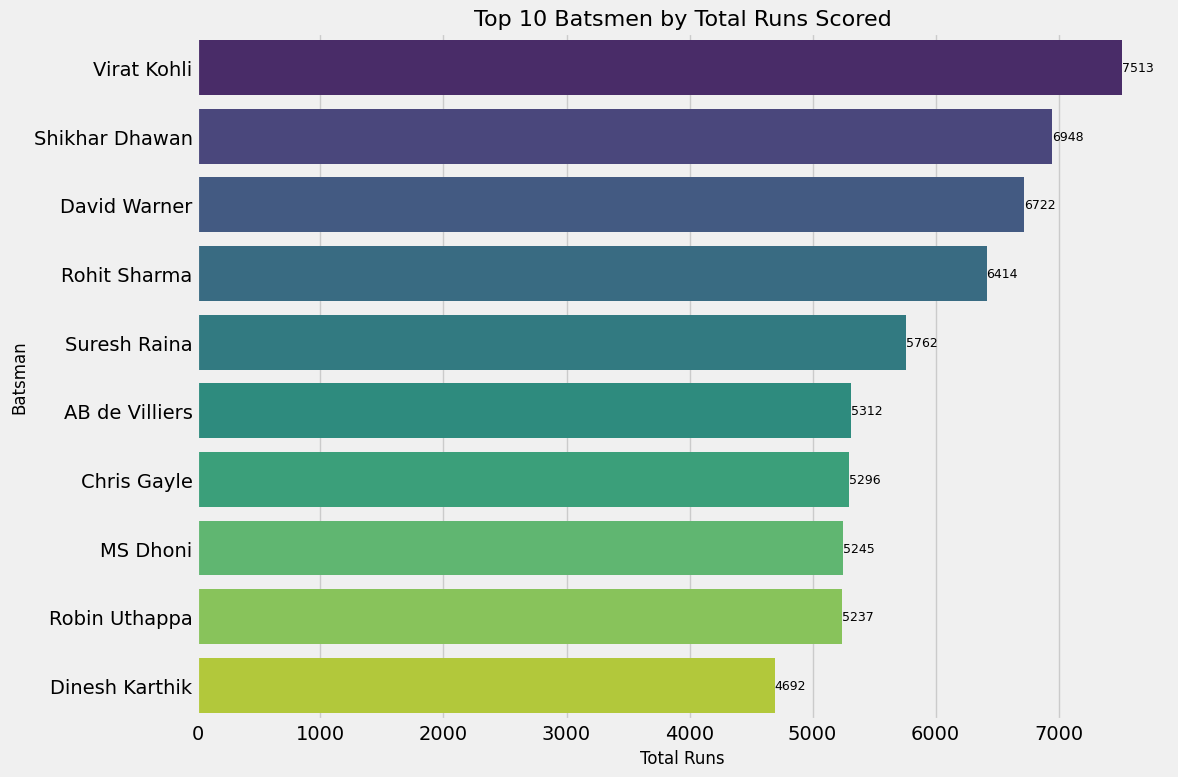

In [79]:
warnings.filterwarnings('ignore')

top_batsmen = ipl_df.groupby('batsman1_name')['runs'].sum().sort_values(ascending=False).head(10).reset_index()
top_batsmen.columns = ['batsman', 'total_runs']

plt.figure(figsize=(12, 8))
palette = sns.color_palette('viridis', n_colors=len(top_batsmen))

bargraph = sns.barplot(x='total_runs', y='batsman', data=top_batsmen, palette=palette)

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_width()),  
        (bar.get_width(), bar.get_y() + bar.get_height() / 2),  
        ha='left', va='center', fontsize=9 
    )

# Set the plot title and axis labels
plt.title('Top 10 Batsmen by Total Runs Scored', fontsize=16)
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Batsman', fontsize=12)

plt.tight_layout()
plt.show()


## Runs Scored by Top 10 Batsmen Across Different Overs

This heatmap visualizes the runs scored by the top 10 batsmen across different overs. Each cell represents the total runs scored by a batsman in a particular over, and the color intensity indicates the magnitude of runs scored. The top 10 batsmen are selected based on their total runs across all overs.

### Key Findings:
- This map clearly shows that **Virat Kohli** and **Rohit Sharma** are consistent in all overs of the game, scoring runs evenly throughout.
- **Shikhar Dhawan** and **David Warner** tend to score more runs in the initial powerplay overs, showcasing their aggressive start.
- **MS Dhoni** is known for his proficiency in the death overs, where he scores the most runs, making him a key player in the final overs of the innings.


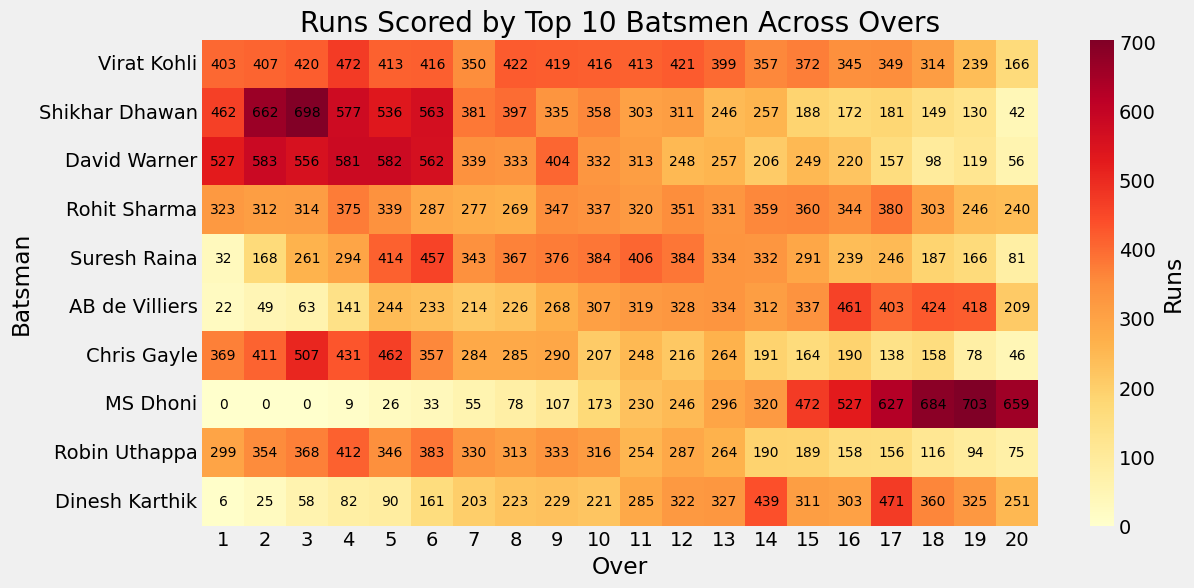

In [95]:
batsman_over_runs = ipl_df.groupby(['batsman1_name', 'over'])['runs'].sum().unstack(fill_value=0)

# Filter to top batsmen (adjust the number as needed)
top_batsmen = batsman_over_runs.sum(axis=1).nlargest(10).index
batsman_over_runs = batsman_over_runs.loc[top_batsmen]

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    batsman_over_runs, 
    annot=True, 
    fmt=".0f", 
    cmap="YlOrRd", 
    cbar_kws={'label': 'Runs', 'orientation': 'vertical'},  # Customize color bar label
    annot_kws={'size': 10, 'color': 'black'}  # Customize annotation font size and color
)
plt.title('Runs Scored by Top 10 Batsmen Across Overs')
plt.xlabel('Over')
plt.ylabel('Batsman')
plt.show()

## Players' Match Participation Analysis

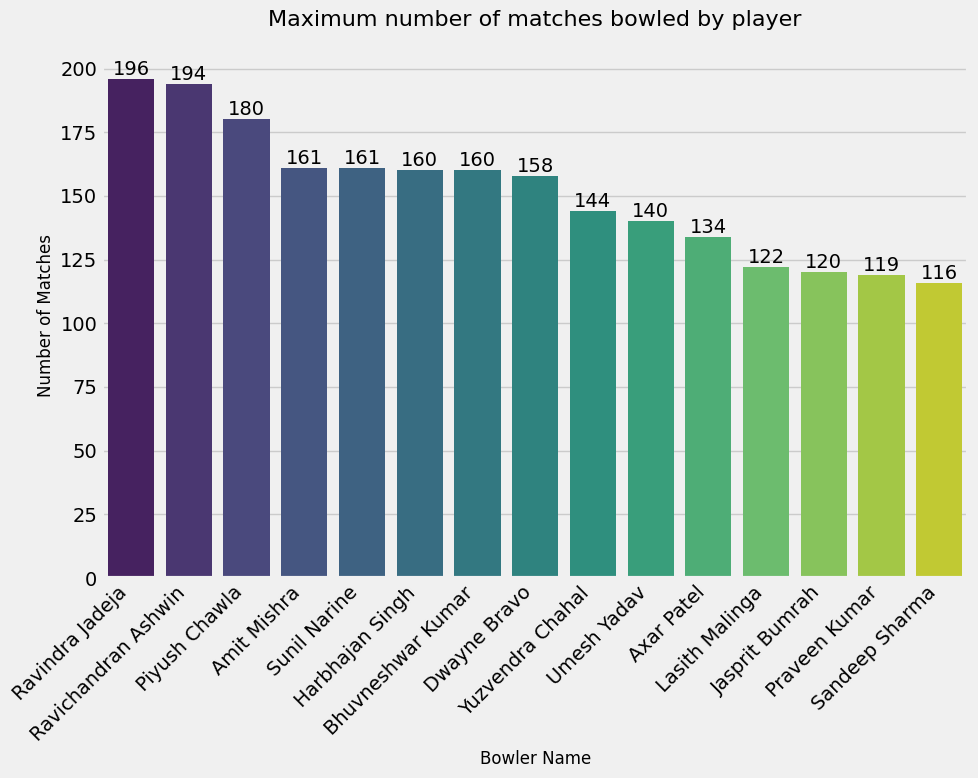


Detailed Analysis of Bowler Participation:
1. Top player Ravindra Jadeja has bowled in 196 matches
2. Average matches among top 15 bowlers: 151.0
3. Median matches among top 15 bowlers: 158.0

Experience Distribution for Bowlers:
Minimum matches: 116
Maximum matches: 196
Standard deviation: 26.2

Gaps Between Bowlers:
Ravichandran Ashwin has bowled in 14 more matches than Piyush Chawla
Piyush Chawla has bowled in 19 more matches than Amit Mishra
Dwayne Bravo has bowled in 14 more matches than Yuzvendra Chahal
Umesh Yadav has bowled in 6 more matches than Axar Patel
Axar Patel has bowled in 12 more matches than Lasith Malinga

Quartile Analysis for Bowlers:
25th percentile: 128 matches
50th percentile: 158 matches
75th percentile: 161 matches


In [97]:
# Calculate the number of unique matches each bowler has played
matches_played_bowler = ipl_df.groupby('bowler1_id')['match_id'].nunique().reset_index().nlargest(15, 'match_id')
matches_played_bowler = matches_played_bowler.rename(columns={'match_id': 'matches_played'})

most_matches_bowler = pd.merge(matches_played_bowler,
                               ipl_df[['bowler1_id', 'bowler1_name']],
                               on='bowler1_id',
                               how='left').drop_duplicates().head(15)

plt.figure(figsize=(10, 8))

sns.barplot(data=most_matches_bowler,
            x='bowler1_name',
            y='matches_played',
            palette='viridis')

plt.title('Maximum number of matches bowled by player', pad=20, fontsize=16)
plt.xlabel('Bowler Name', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(most_matches_bowler['matches_played']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# additional statistics for insights
total_matches_bowler = ipl_df['match_id'].nunique()
avg_matches_bowler = most_matches_bowler['matches_played'].mean()
median_matches_bowler = most_matches_bowler['matches_played'].median()

print("\nDetailed Analysis of Bowler Participation:")
print("==========================================")
print(f"1. Top player {most_matches_bowler.iloc[0]['bowler1_name']} has bowled in {int(most_matches_bowler.iloc[0]['matches_played'])} matches")
print(f"2. Average matches among top 15 bowlers: {avg_matches_bowler:.1f}")
print(f"3. Median matches among top 15 bowlers: {median_matches_bowler:.1f}")

experience_stats_bowler = most_matches_bowler['matches_played'].describe()
print("\nExperience Distribution for Bowlers:")
print("===============================")
print(f"Minimum matches: {int(experience_stats_bowler['min'])}")
print(f"Maximum matches: {int(experience_stats_bowler['max'])}")
print(f"Standard deviation: {experience_stats_bowler['std']:.1f}")

matches_diff_bowler = []
for i in range(len(most_matches_bowler)-1):
    diff = most_matches_bowler.iloc[i]['matches_played'] - most_matches_bowler.iloc[i+1]['matches_played']
    matches_diff_bowler.append((most_matches_bowler.iloc[i]['bowler1_name'],
                               most_matches_bowler.iloc[i+1]['bowler1_name'],
                               diff))

print("\nGaps Between Bowlers:")
print("===========================")
for player1, player2, diff in matches_diff_bowler:
    if diff > 5:  # Only show significant gaps
        print(f"{player1} has bowled in {int(diff)} more matches than {player2}")

quartiles_bowler = most_matches_bowler['matches_played'].quantile([0.25, 0.5, 0.75])
print("\nQuartile Analysis for Bowlers:")
print("=============================")
print(f"25th percentile: {int(quartiles_bowler[0.25])} matches")
print(f"50th percentile: {int(quartiles_bowler[0.5])} matches")
print(f"75th percentile: {int(quartiles_bowler[0.75])} matches")


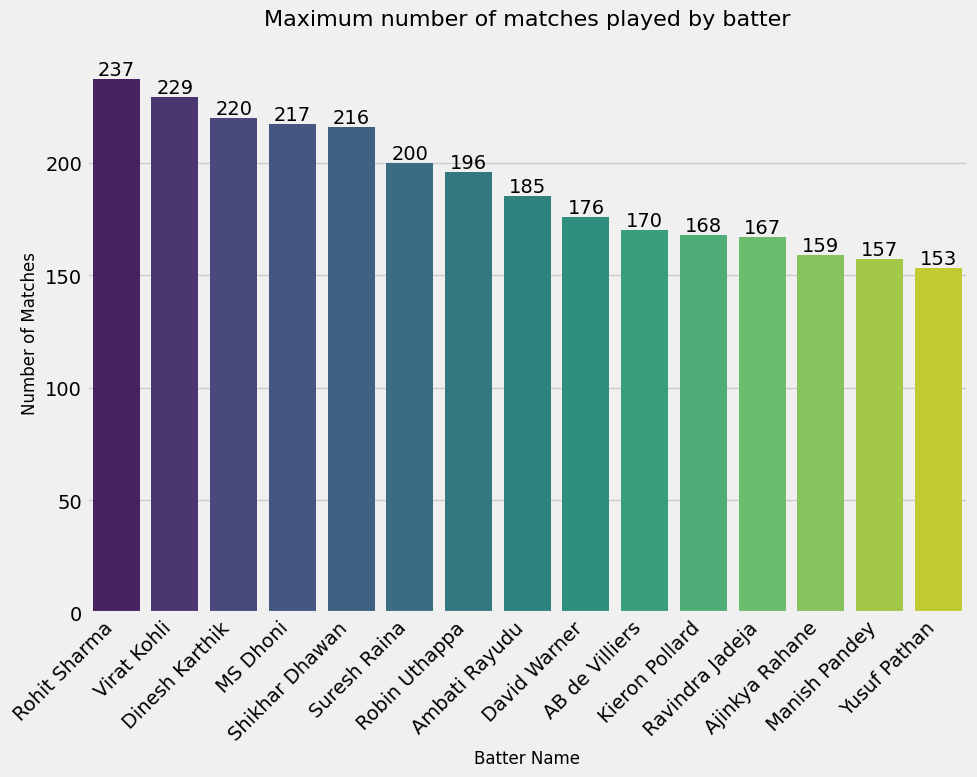


Detailed Analysis of Player Participation:
1. Top player Rohit Sharma has played 237 matches
2. Average matches among top 15 players: 190.0
3. Median matches among top 15 players: 185.0

Experience Distribution:
Minimum matches: 153
Maximum matches: 237
Standard deviation: 28.3

Gaps Between Players:
Rohit Sharma has played 8 more matches than Virat Kohli
Virat Kohli has played 9 more matches than Dinesh Karthik
Shikhar Dhawan has played 16 more matches than Suresh Raina
Robin Uthappa has played 11 more matches than Ambati Rayudu
Ambati Rayudu has played 9 more matches than David Warner
David Warner has played 6 more matches than AB de Villiers
Ravindra Jadeja has played 8 more matches than Ajinkya Rahane

Quartile Analysis:
25th percentile: 167 matches
50th percentile: 185 matches
75th percentile: 216 matches


In [99]:
# Calculate the number of unique matches each batsman has played
matches_played = ipl_df.groupby('batsman1_id')['match_id'].nunique().reset_index().nlargest(15, 'match_id')
matches_played = matches_played.rename(columns={'match_id': 'matches_played'})

most_matches = pd.merge(matches_played,
                       ipl_df[['batsman1_id', 'batsman1_name']],
                       on='batsman1_id',
                       how='left').drop_duplicates().head(15)

plt.figure(figsize=(10, 8))

sns.barplot(data=most_matches,
            x='batsman1_name',
            y='matches_played',
            palette='viridis')

plt.title('Maximum number of matches played by batter', pad=20, fontsize=16)
plt.xlabel('Batter Name', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

plt.xticks(rotation=45, ha='right')

for i, v in enumerate(most_matches['matches_played']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# additional statistics for insights
total_matches = ipl_df['match_id'].nunique()
avg_matches = most_matches['matches_played'].mean()
median_matches = most_matches['matches_played'].median()

print("\nDetailed Analysis of Player Participation:")
print("==========================================")
print(f"1. Top player {most_matches.iloc[0]['batsman1_name']} has played {int(most_matches.iloc[0]['matches_played'])} matches")
print(f"2. Average matches among top 15 players: {avg_matches:.1f}")
print(f"3. Median matches among top 15 players: {median_matches:.1f}")

experience_stats = most_matches['matches_played'].describe()
print("\nExperience Distribution:")
print("======================")
print(f"Minimum matches: {int(experience_stats['min'])}")
print(f"Maximum matches: {int(experience_stats['max'])}")
print(f"Standard deviation: {experience_stats['std']:.1f}")

matches_diff = []
for i in range(len(most_matches)-1):
    diff = most_matches.iloc[i]['matches_played'] - most_matches.iloc[i+1]['matches_played']
    matches_diff.append((most_matches.iloc[i]['batsman1_name'],
                        most_matches.iloc[i+1]['batsman1_name'],
                        diff))

print("\nGaps Between Players:")
print("===========================")
for player1, player2, diff in matches_diff:
    if diff > 5:  # Only show significant gaps
        print(f"{player1} has played {int(diff)} more matches than {player2}")

quartiles = most_matches['matches_played'].quantile([0.25, 0.5, 0.75])
print("\nQuartile Analysis:")
print("================")
print(f"25th percentile: {int(quartiles[0.25])} matches")
print(f"50th percentile: {int(quartiles[0.5])} matches")
print(f"75th percentile: {int(quartiles[0.75])} matches")


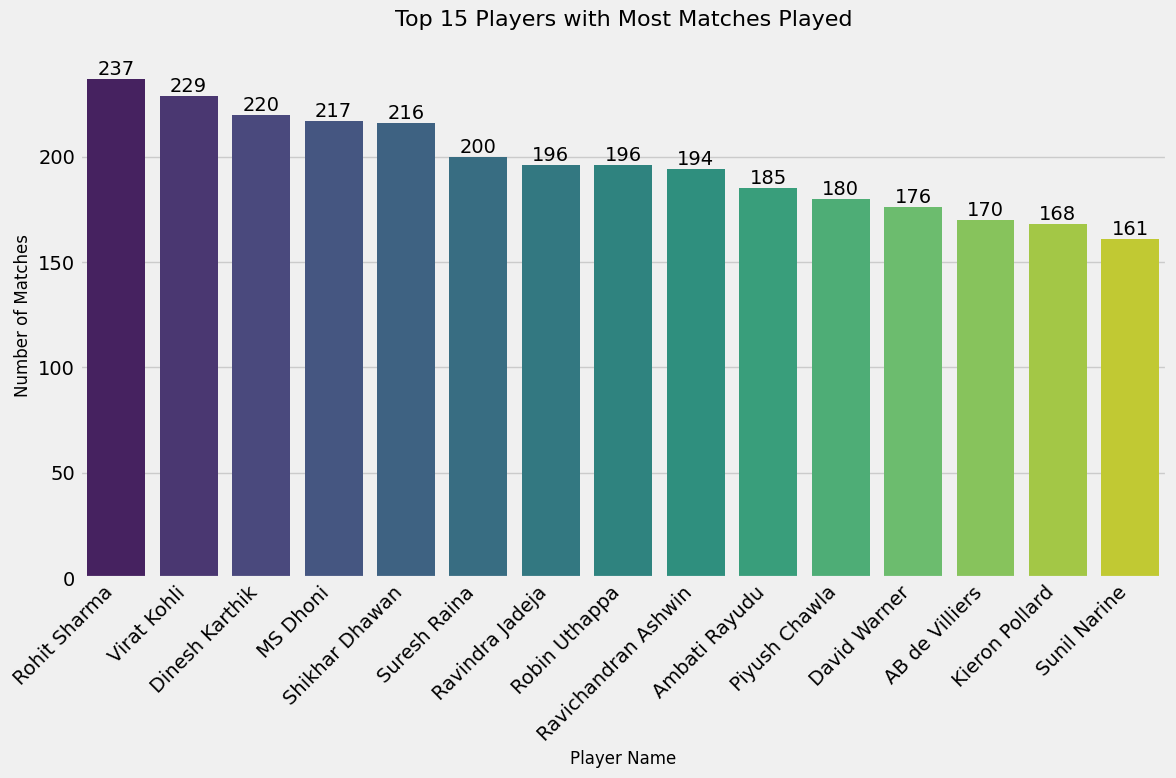


Experience Distribution:
Minimum matches: 161
Maximum matches: 237
Standard deviation: 23.4

Gaps Between Players:
Rohit Sharma has played 8 more matches than Virat Kohli
Virat Kohli has played 9 more matches than Dinesh Karthik
Shikhar Dhawan has played 16 more matches than Suresh Raina
Ravichandran Ashwin has played 9 more matches than Ambati Rayudu
David Warner has played 6 more matches than AB de Villiers
Kieron Pollard has played 7 more matches than Sunil Narine

Quartile Analysis:
25th percentile: 178 matches
50th percentile: 196 matches
75th percentile: 216 matches


In [163]:
# Calculate the number of unique matches each batsman has played
batsman_matches = (
    ipl_df.groupby('batsman1_id')['match_id']
    .nunique()
    .reset_index()
    .rename(columns={'match_id': 'matches_played'})
)

batsman_matches = pd.merge(
    batsman_matches,
    ipl_df[['batsman1_id', 'batsman1_name']].drop_duplicates(),
    on='batsman1_id',
    how='left'
)

batsman_matches['player_type'] = 'Batsman'

# Calculate the number of unique matches each bowler has played
bowler_matches = (
    ipl_df.groupby('bowler1_id')['match_id']
    .nunique()
    .reset_index()
    .rename(columns={'match_id': 'matches_played'})
)

bowler_matches = pd.merge(
    bowler_matches,
    ipl_df[['bowler1_id', 'bowler1_name']].drop_duplicates(),
    on='bowler1_id',
    how='left'
)

bowler_matches['player_type'] = 'Bowler'

# Standardize column names for combining
batsman_matches = batsman_matches.rename(columns={'batsman1_id': 'player_id', 'batsman1_name': 'player_name'})
bowler_matches = bowler_matches.rename(columns={'bowler1_id': 'player_id', 'bowler1_name': 'player_name'})

# Combine batsman and bowler datasets
combined_matches = pd.concat([batsman_matches, bowler_matches])

# For players who have both batted and bowled, take the maximum of their matches played
max_matches = (
    combined_matches.groupby(['player_id', 'player_name'])['matches_played']
    .max()
    .reset_index()
)

# Sort by matches played
max_matches_sorted = max_matches.sort_values('matches_played', ascending=False).reset_index(drop=True)

# Visualize the top 15 players (batsmen + bowlers combined)
top_combined_matches = max_matches_sorted.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_combined_matches,
    x='player_name',
    y='matches_played',
    palette='viridis'
)

plt.title('Top 15 Players with Most Matches Played', pad=20, fontsize=16)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate the bars
for i, v in enumerate(top_combined_matches['matches_played']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Additional Analysis: Experience Distribution
experience_stats = top_combined_matches['matches_played'].describe()
print("\nExperience Distribution:")
print("======================")
print(f"Minimum matches: {int(experience_stats['min'])}")
print(f"Maximum matches: {int(experience_stats['max'])}")
print(f"Standard deviation: {experience_stats['std']:.1f}")

# Calculate gaps between players (only show significant gaps)
matches_diff = []
for i in range(len(top_combined_matches)-1):
    diff = top_combined_matches.iloc[i]['matches_played'] - top_combined_matches.iloc[i+1]['matches_played']
    matches_diff.append((top_combined_matches.iloc[i]['player_name'],
                        top_combined_matches.iloc[i+1]['player_name'],
                        diff))

print("\nGaps Between Players:")
print("===========================")
for player1, player2, diff in matches_diff:
    if diff > 5:  # Only show significant gaps (more than 5 matches)
        print(f"{player1} has played {int(diff)} more matches than {player2}")

# Quartile Analysis
quartiles = top_combined_matches['matches_played'].quantile([0.25, 0.5, 0.75])
print("\nQuartile Analysis:")
print("================")
print(f"25th percentile: {int(quartiles[0.25])} matches")
print(f"50th percentile: {int(quartiles[0.5])} matches")
print(f"75th percentile: {int(quartiles[0.75])} matches")


## Top 10 Bowler-Wicket Pairs by Frequency

The bar plot below shows
the top 10 bowler-wicket pairs based on how often a bowler has dismissed a particular batsman in the dataset.

- **Sunil Narine** has dismissed **Rohit Sharma** **8 times**.
- Other notable pairs can also be seen with their respective number of dismissals.

The graph provides a clear visual representation of the most frequent bowler-batsman wicket combinations.




	 Bowler 	  Batter runs
        Sunil Narine  Rohit Sharma 8
        Amit Mishra  Rohit Sharma 7
  Bhuvneshwar Kumar Parthiv Patel 7
       Mohit Sharma Ambati Rayudu 7
       Pragyan Ojha      MS Dhoni 7
Ravichandran Ashwin Robin Uthappa 7
     Sandeep Sharma   Virat Kohli 7
        Zaheer Khan      MS Dhoni 7
        Amit Mishra  Shane Watson 6
       Ashish Nehra   Virat Kohli 6


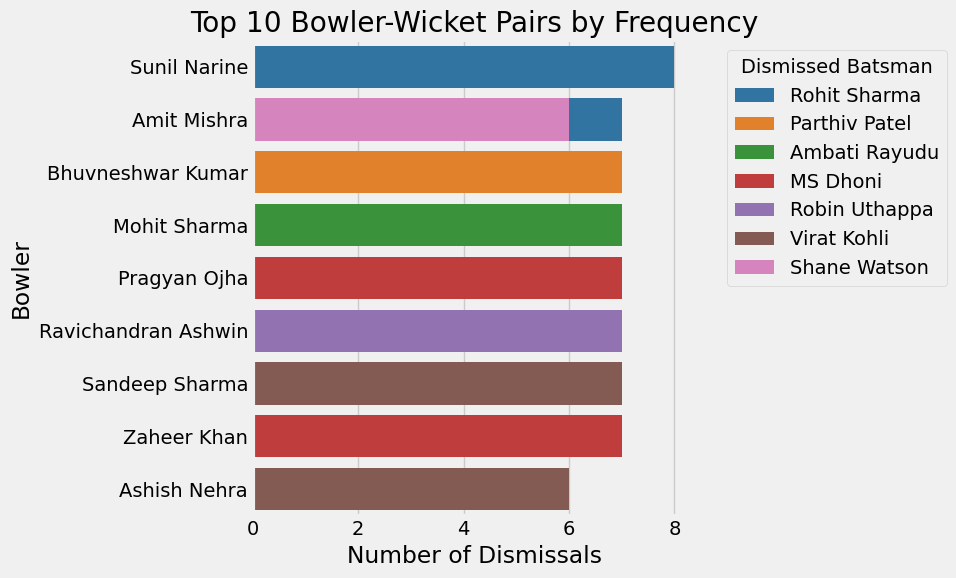

In [121]:
# Group by bowler and count wickets
top_bowlers_wickets = ipl_df.groupby('bowler1_name')['wkt_batsman_name'].value_counts().nlargest(10)

# Convert the series to a DataFrame with reset_index()
top_bowlers_wickets = top_bowlers_wickets.reset_index(name='count')
print(f"\t Bowler \t  Batter runs\n {top_bowlers_wickets.to_string(index=False, header=False)}")

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='bowler1_name', hue='wkt_batsman_name', data=top_bowlers_wickets, dodge=False, palette='tab10')
plt.title('Top 10 Bowler-Wicket Pairs by Frequency')
plt.xlabel('Number of Dismissals')
plt.ylabel('Bowler')

plt.legend(title='Dismissed Batsman', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Top 15 Batsmen by 4s and 6s

- **Shikhar Dhawan** leads the chart with the most 4s, followed closely by **David Warner**.
- **Chris Gayle** holds the record for the most 6s, with **Rohit Sharma** following right behind him.


<Figure size 1800x800 with 0 Axes>

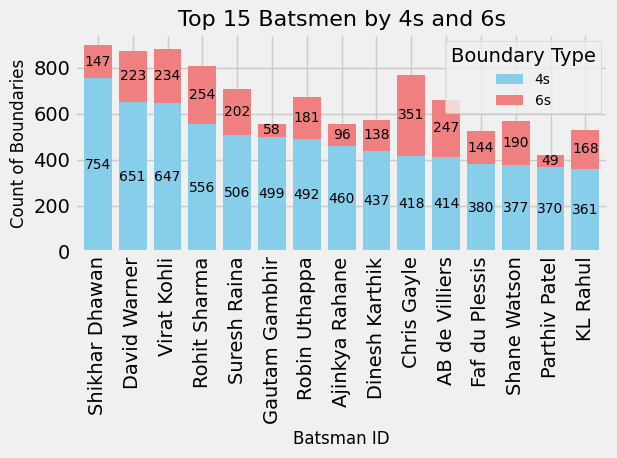

In [124]:
# Filter the DataFrame for 4s and 6s
boundaries_df = ipl_df[ipl_df['runs'].isin([4, 6])]

boundary_counts = boundaries_df.groupby(['batsman1_name', 'runs']).size().unstack(fill_value=0)

# Rename columns for clarity
boundary_counts.columns = ['4s', '6s']
top_15_boundaries = boundary_counts.sort_values(by=['4s', '6s'], ascending=False).head(15)

# Adjust the plot size for increased width
plt.figure(figsize=(18, 8))  # Increase the width of the plot
ax = top_15_boundaries.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], width=0.8)

plt.title('Top 15 Batsmen by 4s and 6s', fontsize=16)
plt.xlabel('Batsman ID', fontsize=12)
plt.ylabel('Count of Boundaries', fontsize=12)
plt.legend(title="Boundary Type", fontsize=10)

# Annotate the bars with boundary counts
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=10)

plt.tight_layout()
plt.show()


# ms_dhoni_match_id = ipl_df.loc[ipl_df['batsman1_name'] == 'MS Dhoni', 'batsman1_id'].iat[0]
# print(f"MS Dhoni Match ID: {ms_dhoni_match_id}")


## Top Run-Scoring Batsmen with the Highest Strike Rates

- **Chris Gayle** stands out with the highest strike rate among the top run-scorers, closely followed by **David Warner**. Their exceptional ability to score runs quickly highlights their dominance at the crease, with Gayle leading the pack in explosive batting performances.


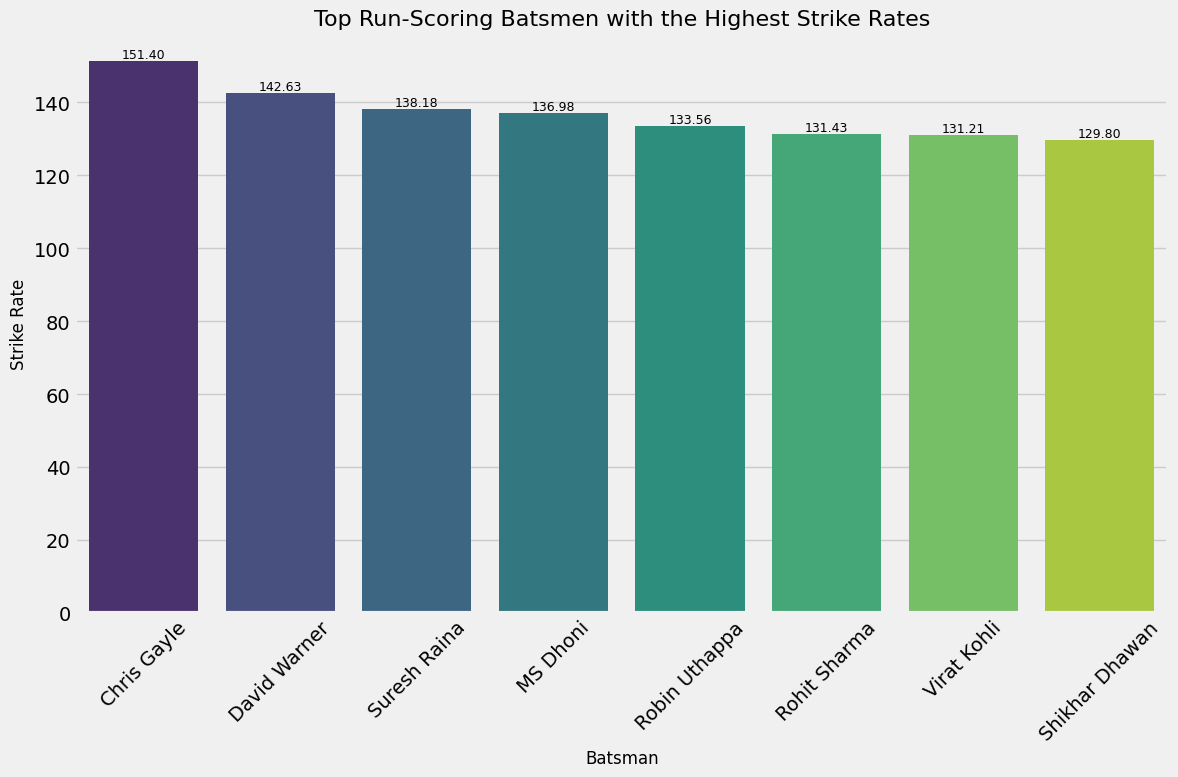

In [126]:
top_batsmen = ipl_df.groupby('batsman1_name')['runs'].sum().sort_values(ascending=False).head(10).reset_index()
top_batsmen.columns = ['batsman', 'total_runs']

top_balls_faced = ipl_df.groupby('batsman1_name')['ball'].count().sort_values(ascending=False).head(10).reset_index()
top_balls_faced.columns = ['batsman', 'total_balls_faced']

strike_rate_data = pd.merge(top_batsmen, top_balls_faced, on='batsman')

strike_rate_data['strike_rate'] = (strike_rate_data['total_runs'] / strike_rate_data['total_balls_faced']) * 100

plt.figure(figsize=(12, 8))
palette = sns.color_palette('viridis', n_colors=len(strike_rate_data))

bargraph = sns.barplot(x='batsman', y='strike_rate', data=strike_rate_data.sort_values('strike_rate',ascending=False), palette=palette)

for bar in bargraph.patches:
    bargraph.annotate(
        f"{bar.get_height():.2f}", 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', 
        va='bottom',
        fontsize=9
    )

plt.title('Top Run-Scoring Batsmen with the Highest Strike Rates', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top 10 Batsmen with the Most Centuries

This bar chart highlights the top 10 batsmen who have scored the most centuries in the dataset. The count represents the total number of centuries achieved by each player.

### Key Findings:
- **Virat Kohli** leads the chart with 7 centuries, showcasing his exceptional batting prowess.
- **Chris Gayle** follows closely with 6 centuries, known for his explosive batting style.
- **Jos Buttler** secures the third position with 5 centuries, demonstrating his consistency in scoring big runs.


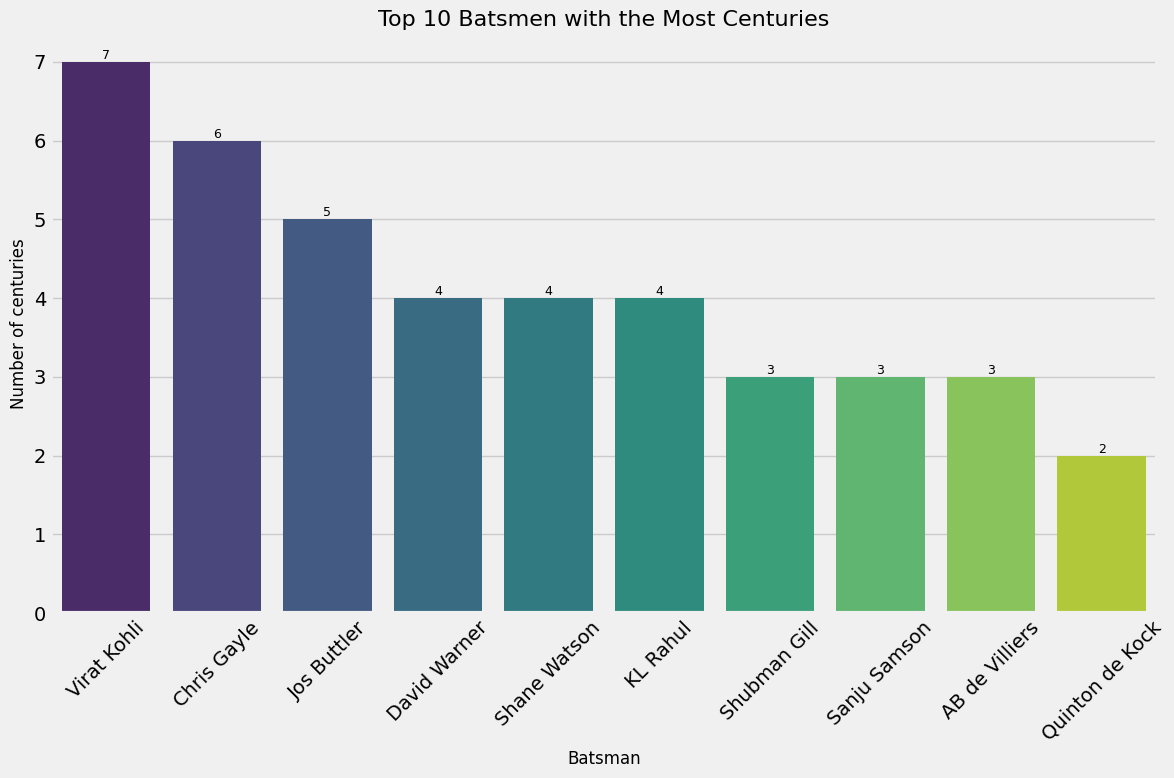

In [128]:
h=ipl_df[['match_id','innings_id','batsman1_name','batsman1_runs']][ipl_df['batsman1_runs']>= 100]
h.groupby(['match_id','innings_id','batsman1_name'])['batsman1_runs'].max()
a=h.groupby(['match_id','batsman1_name',])['batsman1_runs'].max().sort_values(ascending=False).reset_index()
batsman_counts = a['batsman1_name'].value_counts().sort_values(ascending=False).head(10)

batsman_counts_df = batsman_counts.reset_index()
batsman_counts_df.columns = ['batsman', 'count']

plt.figure(figsize=(12, 8))
palette = sns.color_palette('viridis', n_colors=len(batsman_counts_df))

bargraph = sns.barplot(x='batsman', y='count', data=batsman_counts_df, palette=palette)

for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', 
        va='bottom',
        fontsize=9
    )

plt.title('Top 10 Batsmen with the Most Centuries', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Number of centuries', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **Bowler Analysis**

## Top 10 Bowlers by Wide Balls Bowled

This bar chart highlights the top 10 bowlers who have bowled the most wide balls in the dataset.

Key Findings:
- **Dwayne Bravo** leads with 166 wide balls, followed by **Ravichandran Ashwin** with 134.
- These two bowlers stand out with a considerable number of wides compared to others in the dataset.


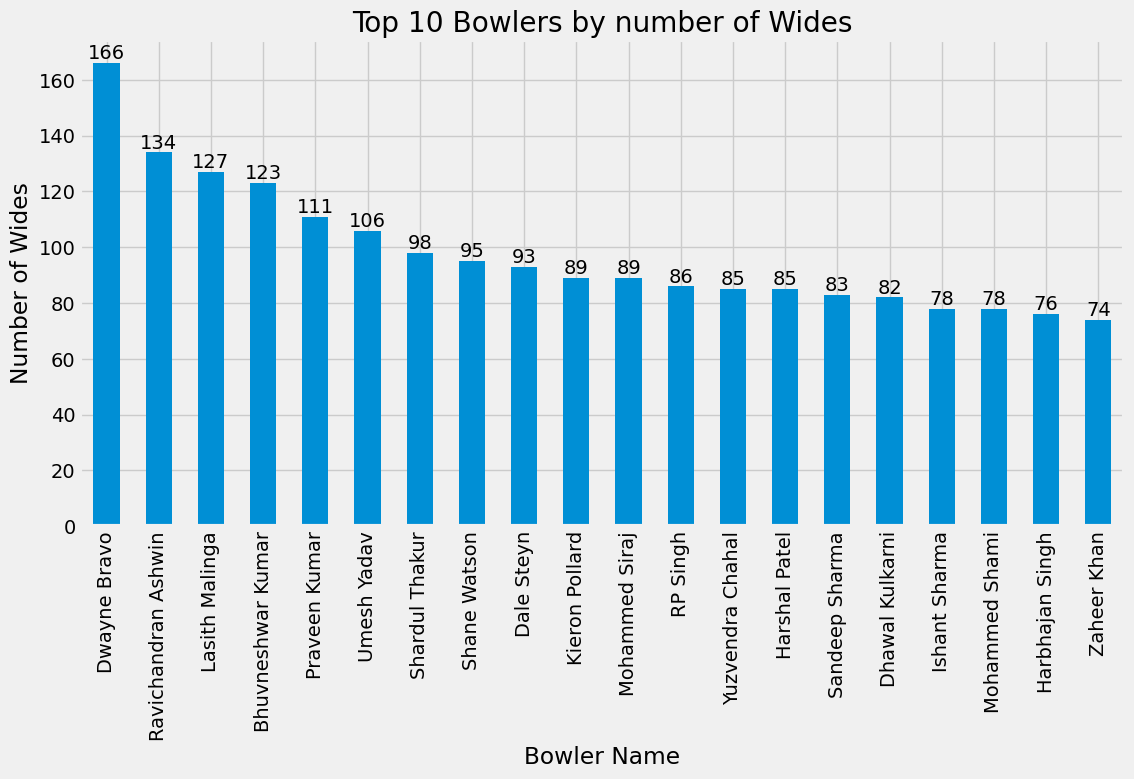

In [131]:
#Filter data for 'isWide' == True before groupby and Use count to get the number of wide balls per bowler
top_bowlers = ipl_df[ipl_df['isWide'] == True].groupby('bowler1_name')['isWide'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax=top_bowlers.plot(kind='bar')
for i, v in enumerate(top_bowlers):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.title('Top 10 Bowlers by number of Wides')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Wides')
#plt.xticks(rotation=45)
plt.show()
#


## Wicket Fall Distribution Across Overs by Top 15 Bowlers

Total wickets: 11880


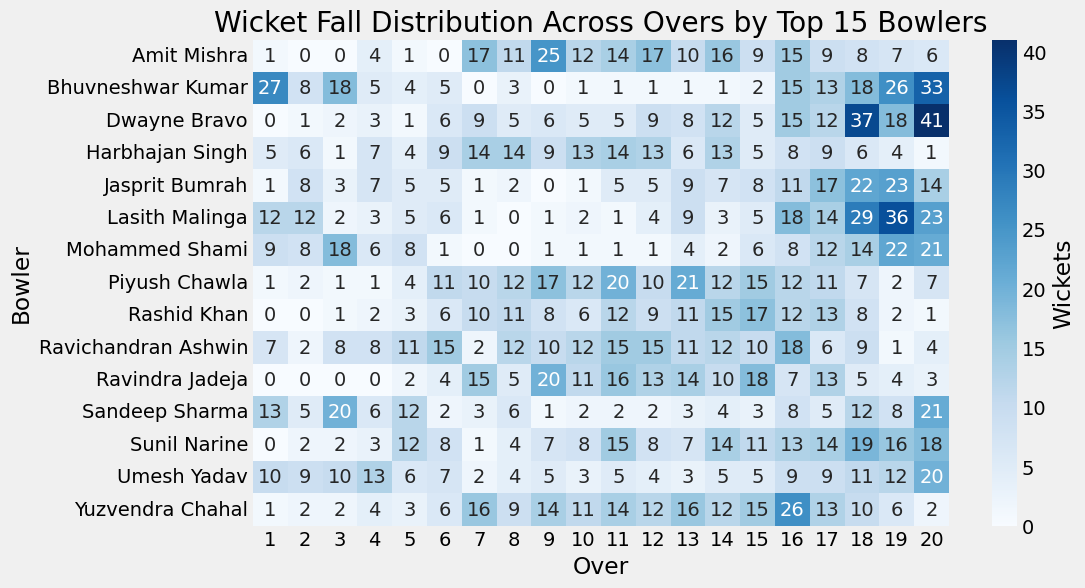

In [133]:
# Identify the top 15 bowlers with the most wickets
top_bowlers_wickets = ipl_df.groupby('bowler1_name')['wkt_batsman_name'].count().nlargest(15)
print(f"Total wickets: {ipl_df['wkt_batsman_name'].count()}")
# List of top 15 bowlers
top_bowlers = top_bowlers_wickets.index.tolist()

top_bowlers_data = ipl_df[ipl_df['bowler1_name'].isin(top_bowlers)]

# Group by bowler name and over to count the wickets per over for each bowler
wickets_per_over = top_bowlers_data[top_bowlers_data['wkt_batsman_name'].notnull()]
wickets_per_over = wickets_per_over.groupby(['bowler1_name', 'over'])['wkt_batsman_name'].count().reset_index(name='wicket_count')

# Create a pivot table for heatmap
wickets_pivot = wickets_per_over.pivot(index='bowler1_name', columns='over', values='wicket_count').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(wickets_pivot, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Wickets'})
plt.title('Wicket Fall Distribution Across Overs by Top 15 Bowlers')
plt.xlabel('Over')
plt.ylabel('Bowler')

plt.show()

## Highest scores - centuries

match_name  season    batsman1_name  runs
 RCB v PWI    2013      Chris Gayle   180
 RCB v KKR    2008 Brendon McCullum   169
 KKR v LSG    2022  Quinton de Kock   141
  MI v RCB    2015   AB de Villiers   138
KXIP v RCB    2020         KL Rahul   138
   GT v MI    2023     Shubman Gill   133
  RCB v GL    2016   AB de Villiers   132
  RR v SRH    2021      Jos Buttler   131
KXIP v RCB    2011   Adam Gilchrist   130
  DC v SRH    2018     Rishabh Pant   130


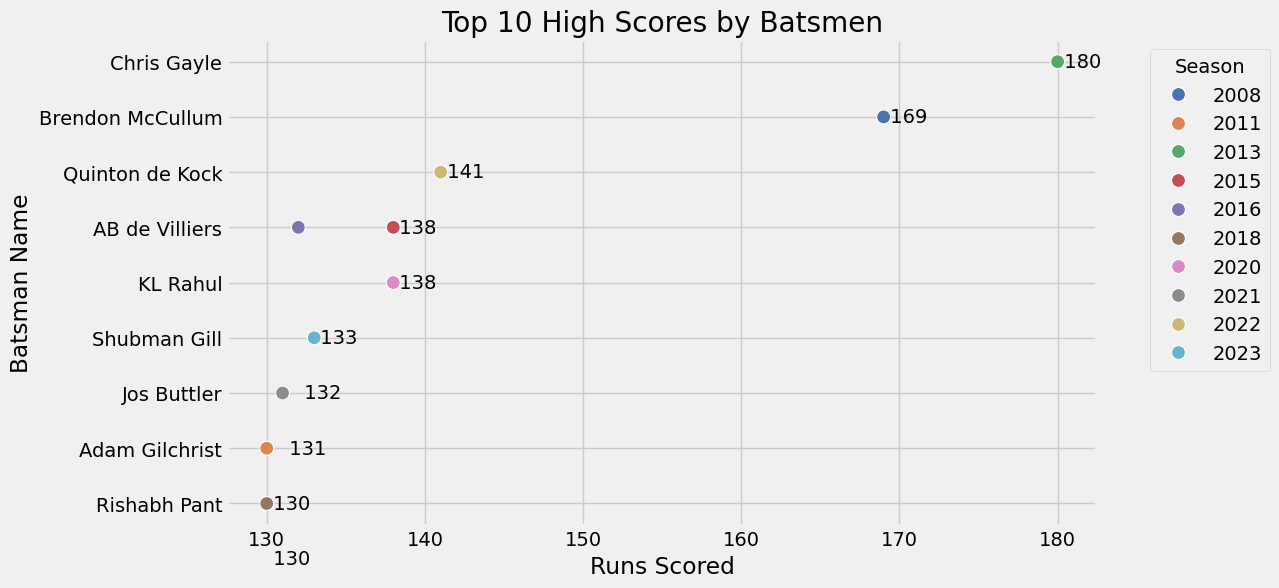

In [135]:
# Group by 'match_id' and 'batsman1_id', then sum 'batsman1_runs'
batsman_runs = ipl_df.groupby(['match_id', 'batsman1_id'])['runs'].sum().reset_index()

# Filter for sums greater than or equal to 100
centuries = batsman_runs[batsman_runs['runs'] >= 100]

# Merge with the original DataFrame to get 'batsman1_name'
result = pd.merge(
    centuries,
    ipl_df[['match_id', 'batsman1_id', 'batsman1_name', 'match_name', 'season']],
    on=['match_id', 'batsman1_id'],
    how='left'
).drop_duplicates().nlargest(10, 'runs')

# Display the result with relevant columns
print(result[['match_name', 'season', 'batsman1_name', 'runs']].to_string(index=False))

plt.figure(figsize=(10, 6))
ax=sns.scatterplot(x='runs', y='batsman1_name', hue='season', data=result, palette='deep', s=100)
plt.title('Top 10 High Scores by Batsmen')
plt.xlabel('Runs Scored')
plt.ylabel('Batsman Name')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
for index, value in enumerate(result['runs']):
   plt.text(value, index, f" {value}", va='center')
plt.show()

## Orange Cap Winner of the season`

In [137]:

# Plot top batsmen per season
for season, data in mapped_top_batsmen.items():
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(
        x='batsman1_name', y='runs', data=data, palette='viridis',
        order=data.sort_values('runs', ascending=False)['batsman1_name']
    )
    
    orange_cap_batsman = data.loc[data['runs'].idxmax()]
    plt.title(f'Top 10 Batsmen in Season {season}\nOrange Cap Winner: {orange_cap_batsman["batsman1_name"]}', fontsize=16)
    plt.xlabel('Batsman', fontsize=12)
    plt.ylabel('Total Runs', fontsize=12)
    plt.xticks(rotation=45)
    
    # Display scores on the bars
    for bar in ax.patches:
        ax.annotate(
            f'{int(bar.get_height())}',  # Display run score
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position on the bar
            ha='center', va='bottom', fontsize=10, color='black'
        )
    
    plt.tight_layout()
    plt.show()

# Cumulative runs scored by Orange Cap winners
orange_cap_df = pd.DataFrame(orange_cap_winners, columns=['Batsman', 'Season', 'Team'])
orange_cap_totals = orange_cap_df.groupby('Batsman').size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Batsman', y='Count', data=orange_cap_totals, palette='coolwarm')
plt.title('Cumulative Orange Cap Wins by Batsmen', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Orange Caps Won', fontsize=12)
plt.xticks(rotation=45)

# Display scores on the bars
for bar in ax.patches:
    ax.annotate(
        f'{int(bar.get_height())}',  # Display number of Orange Caps
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position on the bar
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


NameError: name 'mapped_top_batsmen' is not defined

#  Top 10 batter of *season* 2022


In [ ]:
season_2022 = ipl_df[ipl_df['season'] == 2022]

# Calculate total runs for each batsman in the 2022 season
top_batsmen_2022 = season_2022.groupby('batsman1_id')['runs'].sum().reset_index().sort_values(by='runs', ascending=False).head(10)

# Merge with the original DataFrame to get 'batsman1_name' and 'current_innings'
top_batsmen_2022 = pd.merge(top_batsmen_2022, ipl_df[['batsman1_id', 'batsman1_name', 'current_innings']], on='batsman1_id', how='left').drop_duplicates(subset='batsman1_id')
top_batsmen_2022['team_name'] = top_batsmen_2022['current_innings'].apply(get_team_name)

print(f"\tBatter  Runs  \t\t Team \n {top_batsmen_2022[['batsman1_name', 'runs', 'team_name']].to_string(index=False, header=False)}")

# Runs Distribution across Powerplay, Middle Over and Death Overs

In [ ]:
powerplay_runs = ipl_df[ipl_df['over'] <= 6]['runs'].sum()
middle_over_runs = ipl_df[(ipl_df['over'] > 6) & (ipl_df['over'] <= 15)]['runs'].sum()
death_over_runs = ipl_df[ipl_df['over'] > 15]['runs'].sum()

# Create a DataFrame for plotting
runs_data = pd.DataFrame({
    'Over Phase': ['Powerplay (1-6)', 'Middle Overs (7-15)', 'Death Overs (16-20)'],
    'Total Runs': [powerplay_runs, middle_over_runs, death_over_runs]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Over Phase', y='Total Runs', data=runs_data, palette='tab10')
plt.title('Total Runs per Over Phase')
plt.xlabel('Over Phase')
plt.ylabel('Total Runs')

for i, v in enumerate(runs_data['Total Runs']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')

plt.show()

In [ ]:
season_runs = ipl_df.groupby('season')['runs'].mean().reset_index()
fig = px.line(season_runs, x='season', y='runs', title="Average Runs per Season")
fig.update_xaxes(title="Season")
fig.update_yaxes(title="Average Runs")
fig.show()

In [ ]:

fig = px.scatter(ipl_df, x='runs', y='wicket_id', color='current_innings', title="Runs vs Wickets by Innings",
                 labels={'runs': 'Runs', 'wicket_id': 'Wickets'})
fig.show()